In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

from simulated_annealer import SimulatedAnnealer

mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 12   
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['errorbar.capsize'] = 4
plt.style.use('ggplot')

In [2]:
def trivial_objective(params):
    return params['x']**2 + params['y']**2 + params['z']**2

param_grid = {
    'x': np.linspace(-1, 1, 50).tolist(),
    'y': np.linspace(-1, 1, 50).tolist(),
    'z': np.linspace(-1, 1, 50).tolist()
}

an = SimulatedAnnealer(
    param_grid, 
    initial_temp = 1, 
    cooling_halflife = 60, 
    max_iter = 500,
    max_neighbour_attempts = 500,
    var_n_param_changes = True,
    n_param_proposal_poi_lam = 0.3,
    var_jump_size = True,
    jump_size_poi_lam = 0.3
    )



In [3]:
history, best_state, best_energy = an.fit(trivial_objective, verbose = True)

Iteration 1   , T: 0.9885, P(acc) : 0.8608 E: 1.3773 Accepted: 1, Best Energy: 1.2274, Iter: 1.17e+00s
Iteration 2   , T: 0.9772, P(acc) : 1.0000 E: 1.2274 Accepted: 1, Best Energy: 1.2274, Iter: 8.40e-02s
Iteration 3   , T: 0.9659, P(acc) : 1.0000 E: 1.2241 Accepted: 1, Best Energy: 1.2241, Iter: 1.40e-03s
Iteration 4   , T: 0.9548, P(acc) : 1.0000 E: 1.2241 Accepted: 1, Best Energy: 1.2241, Iter: 6.60e-04s
Location already visited, trying again. Attempt 1
Location already visited, trying again. Attempt 2
Iteration 5   , T: 0.9439, P(acc) : 0.9965 E: 1.2274 Accepted: 1, Best Energy: 1.2241, Iter: 6.02e-04s
Iteration 6   , T: 0.9330, P(acc) : 0.9518 E: 1.2274 Accepted: 0, Best Energy: 1.2241, Iter: 5.91e-04s
Iteration 7   , T: 0.9223, P(acc) : 1.0000 E: 1.1441 Accepted: 1, Best Energy: 1.1441, Iter: 6.07e-04s
Iteration 8   , T: 0.9117, P(acc) : 1.0000 E: 1.1408 Accepted: 1, Best Energy: 1.1408, Iter: 8.71e-04s
Iteration 9   , T: 0.9013, P(acc) : 0.9160 E: 1.2207 Accepted: 1, Best Energ

In [4]:
history = history[history['accepted']].reset_index(drop=True)

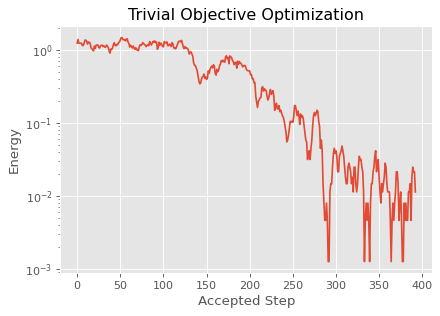

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(history['energy'])
plt.title('Trivial Objective Optimization')
plt.xlabel('Accepted Step')
plt.ylabel('Energy')
plt.yscale('log')
plt.show()

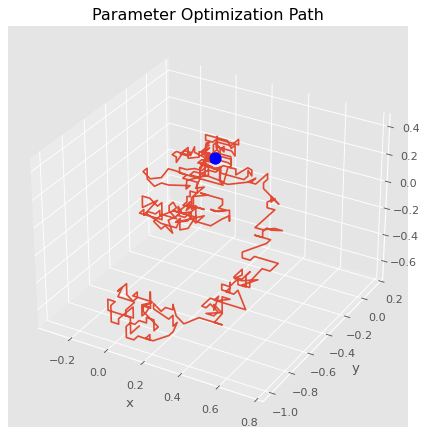

In [6]:
# plot 3d scatter of x, y, z
fig = plt.figure(figsize=(8, 6.5))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Parameter Optimization Path')
p = ax.plot(history['x'], history['y'], history['z'])
ax.plot(0, 0, 0, 'bo', markersize=10, label='Optimal Point (0,0,0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


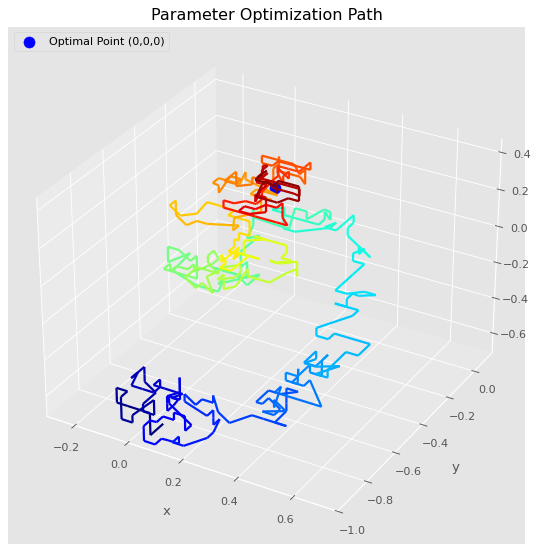

In [7]:
# plot 3d scatter of x, y, z with color gradient by index
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Parameter Optimization Path')

# Create a colormap
points = np.array([history['x'], history['y'], history['z']]).T
segments = np.concatenate([points[:-1, None], points[1:, None]], axis=1)

# Create a colored line collection
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Normalize colors based on index
N = len(history)
colors = plt.cm.jet(np.linspace(0, 1, N))

# Create line segments with colors
line_segments = []
for i in range(N-1):
    line_segments.append(np.array([[history['x'][i], history['y'][i], history['z'][i]],
                                  [history['x'][i+1], history['y'][i+1], history['z'][i+1]]]))

lc = Line3DCollection(line_segments, colors=colors[:-1], linewidth=2)
ax.add_collection(lc)


# Add the optimal point and set axis limits
ax.scatter(0, 0, 0, color='blue', s=100, label='Optimal Point (0,0,0)')
ax.set_xlim([history['x'].min(), history['x'].max()])
ax.set_ylim([history['y'].min(), history['y'].max()])
ax.set_zlim([history['z'].min(), history['z'].max()])

ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [8]:
# simple linear regression example
p = 3
X = np.random.randn(500, p)
weights = np.random.randn(p)/np.sqrt(p)
bias = np.random.randn(1)
noise = 0.1

y = X @ weights + bias + np.random.randn(500) * noise

def lr_objective(params, X_tr, y_tr):
    w = np.array([params[f'w{i}'] for i in range(p)])
    b = params['b']
    preds = X_tr @ w + b
    return np.mean((preds - y_tr) ** 2)

param_grid = {
    **{f'w{i}': np.linspace(-2, 2, 40).tolist() for i in range(p)},
    'b' : np.linspace(-2, 2, 40).tolist()
    }

an = SimulatedAnnealer(
    param_grid, 
    max_iter=500,
    cooling_halflife = 50,
    var_n_param_changes = True,
    var_jump_size = True,
    )

history, best_params, best_energy = an.fit(lr_objective, evaluation_args = {'X_tr': X, 'y_tr': y}, verbose = True)

Iteration 1   , T: 0.9862, P(acc) : 1.0000 E: 11.8057 Accepted: 1, Best Energy: 11.8057, Iter: 7.06e-04s
Location already visited, trying again. Attempt 1
Iteration 2   , T: 0.9727, P(acc) : 1.0000 E: 11.2730 Accepted: 1, Best Energy: 11.2730, Iter: 6.01e-04s
Location already visited, trying again. Attempt 1
Iteration 3   , T: 0.9593, P(acc) : 0.7423 E: 11.5629 Accepted: 1, Best Energy: 11.2730, Iter: 5.00e-04s
Iteration 4   , T: 0.9461, P(acc) : 0.5093 E: 12.2101 Accepted: 1, Best Energy: 11.2730, Iter: 4.89e-04s
Iteration 5   , T: 0.9330, P(acc) : 1.0000 E: 12.1678 Accepted: 1, Best Energy: 11.2730, Iter: 5.00e-04s
Iteration 6   , T: 0.9202, P(acc) : 0.8905 E: 12.2760 Accepted: 1, Best Energy: 11.2730, Iter: 4.92e-04s
Iteration 7   , T: 0.9075, P(acc) : 0.6198 E: 12.7161 Accepted: 1, Best Energy: 11.2730, Iter: 5.28e-04s
Iteration 8   , T: 0.8950, P(acc) : 1.0000 E: 12.6074 Accepted: 1, Best Energy: 11.2730, Iter: 4.78e-04s
Location already visited, trying again. Attempt 1
Location a

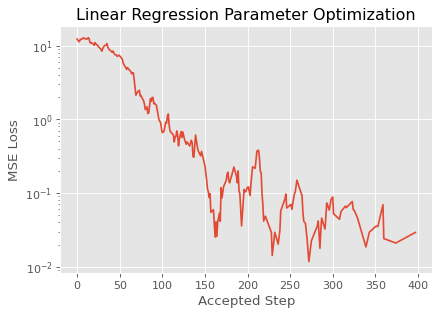

In [9]:
plt.figure(figsize=(6, 4))
plt.title('Linear Regression Parameter Optimization')
plt.xlabel('Accepted Step')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.plot(history[history['accepted']]['energy'])
plt.show()

In [10]:
print('Best params:   ', np.array([round(best_params[f'w{i}'], 8) for i in range(p)]), best_params['b'])
lr = LinearRegression().fit(X, y)
print('Sklearn params:', lr.coef_, lr.intercept_)
print('True Params:   ', weights, bias)

Best params:    [ 0.15384615 -0.46153846 -0.56410256] 0.2564102564102564
Sklearn params: [ 0.13175243 -0.42303064 -0.56250251] 0.27633387802688997
True Params:    [ 0.12499326 -0.42497311 -0.56439919] [0.28196996]


1.8083533916579235


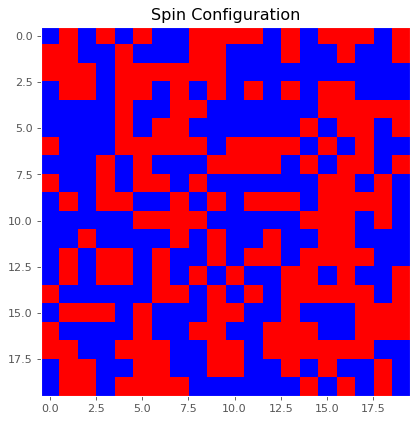

In [12]:
# TODO RF Ising model or something! Domains emergence on 2d-grid
from scipy import sparse
from numba import jit

rows = 20
cols = 20

N = rows * cols

row_indices = []
col_indices = []
values = []

# Create interactions more efficiently - only store non-zero elements
for i in range(N):
    # Calculate grid position
    row_i, col_i = i // cols, i % cols
    
    # Check neighbors: right, left, down, up
    neighbors = []
    if col_i < cols - 1:  # right neighbor
        neighbors.append(i + 1)
    if col_i > 0:  # left neighbor
        neighbors.append(i - 1)
    if row_i < rows - 1:  # down neighbor
        neighbors.append(i + cols)
    if row_i > 0:  # up neighbor
        neighbors.append(i - cols)
    
    # Add interactions for each neighbor
    for j in neighbors:
        row_indices.append(i)
        col_indices.append(j)
        values.append(np.random.randn() * 0.1)  # Random coupling strength

# Create sparse matrix
J_ij = sparse.csr_matrix((values, (row_indices, col_indices)), shape=(N, N))
h_i = np.random.randn(N) * 0.1

parameters = {
    f's{i}' : [-1, 1] for i in range(N)
    }

def hamiltonian(params):
    s = np.array([params[f's{i}'] for i in range(N)])
    interaction_energy = -0.5 * s.T @ J_ij @ s
    field_energy = -h_i @ s
    return 1000 * (interaction_energy + field_energy)/ (rows * cols)

def visualize_spins(params):
    plt.figure(figsize=(6, 6))
    s = np.array([params[f's{i}'] for i in range(N)]).reshape((rows, cols))
    plt.imshow(s, cmap='bwr', vmin=-1, vmax=1)
    #plt.colorbar(label='Spin State')
    plt.title('Spin Configuration')
    plt.grid(False)



print(hamiltonian({f's{i}': np.random.choice([-1, 1]) for i in range(N)}))
visualize_spins({f's{i}': np.random.choice([-1, 1]) for i in range(N)})

In [13]:
an = SimulatedAnnealer(
    parameters,
    initial_temp = 1,
    cooling_halflife = 60,
    max_iter = 1000,
    max_neighbour_attempts = 1000,
    var_n_param_changes = True,
    n_param_proposal_poi_lam = 0.5,
    var_jump_size = False,
    jump_size_poi_lam = 1
    )

history, best_state, best_energy = an.fit(hamiltonian, verbose = True)

Iteration 1   , T: 0.9885, P(acc) : 0.2481 E: -6.8030 Accepted: 0, Best Energy: -6.8030, Iter: 4.08e-01s
Iteration 2   , T: 0.9772, P(acc) : 1.0000 E: -6.8577 Accepted: 1, Best Energy: -6.8577, Iter: 9.03e-03s
Iteration 3   , T: 0.9659, P(acc) : 1.0000 E: -8.1662 Accepted: 1, Best Energy: -8.1662, Iter: 6.92e-03s
Iteration 4   , T: 0.9548, P(acc) : 0.3984 E: -8.1662 Accepted: 0, Best Energy: -8.1662, Iter: 7.21e-03s
Iteration 5   , T: 0.9439, P(acc) : 0.1667 E: -8.1662 Accepted: 0, Best Energy: -8.1662, Iter: 6.42e-03s
Iteration 6   , T: 0.9330, P(acc) : 1.0000 E: -8.4773 Accepted: 1, Best Energy: -8.4773, Iter: 7.28e-03s
Iteration 7   , T: 0.9223, P(acc) : 0.1451 E: -8.4773 Accepted: 0, Best Energy: -8.4773, Iter: 6.52e-03s
Iteration 8   , T: 0.9117, P(acc) : 0.6170 E: -8.0319 Accepted: 1, Best Energy: -8.4773, Iter: 6.87e-03s
Iteration 9   , T: 0.9013, P(acc) : 1.0000 E: -8.9110 Accepted: 1, Best Energy: -8.9110, Iter: 6.75e-03s
Iteration 10  , T: 0.8909, P(acc) : 0.9403 E: -8.8555 A

In [14]:
# makign a gif of the visualization of the spisn over time with the temperature displayed
import imageio
import os

if not os.path.exists('frames'):
    os.makedirs('frames')
    
filenames = []
T = an.initial_temp
for i, row in history[history.accepted].iterrows():
    visualize_spins(row.to_dict())
    plt.title(f'Spin Configuration at Step {i+1}, T={T:.3f}')
    filename = f'frames/spins_{i:03d}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()
    T = np.exp(-an.lam) * T

with imageio.get_writer('spin_optimization.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
# Remove frame files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_141343/299491964.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
